In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
insurance_data = pd.read_csv('../../data/insurance.csv')
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [53]:
# insurance_data['age'].sort_values().iloc[-10:] = np.median(insurance_data['age'])
insurance_data.copy()['age'].sort_values().iloc[-10:] = 39  #= np.median(insurance_data['age'])

In [56]:
temp = insurance_data.copy()['age'].sort_values()
temp.iloc[:10] = np.median(insurance_data['age'])
temp.iloc[-10:] = np.median(insurance_data['age'])

In [60]:
np.mean(temp), np.mean(insurance_data)

(39.17713004484305,
 age            39.207025
 bmi            30.663397
 children        1.094918
 charges     13270.422265
 dtype: float64)

In [6]:
temp = insurance_data['children'].value_counts() / insurance_data.shape[0]

temp.index * temp.values

Float64Index([                0.0,   0.242152466367713, 0.35874439461883406,
              0.35201793721973096, 0.07473841554559044, 0.06726457399103139],
             dtype='float64')

In [3]:
test = np.random.normal(loc=np.mean(insurance_data['charges']),
                        scale=np.std(insurance_data['charges']),
                        size=1338)

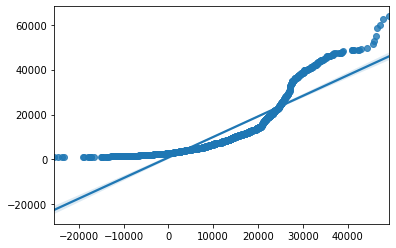

In [6]:
sns.regplot(y=np.percentile(insurance_data['charges'], np.linspace(0, 100, 1338)),
            x=np.percentile(test,np.linspace(0,100,1338)))

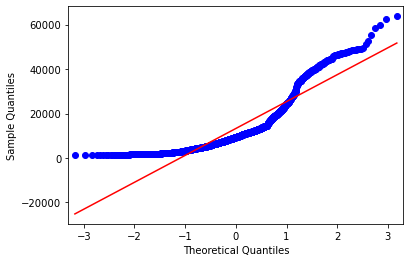

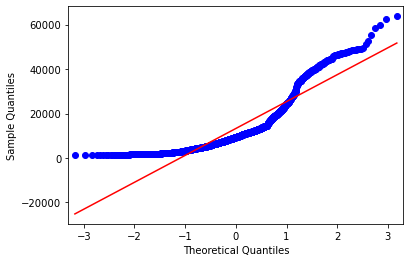

In [7]:
from statsmodels.graphics.gofplots import qqplot

qqplot(insurance_data['charges'], line='s')

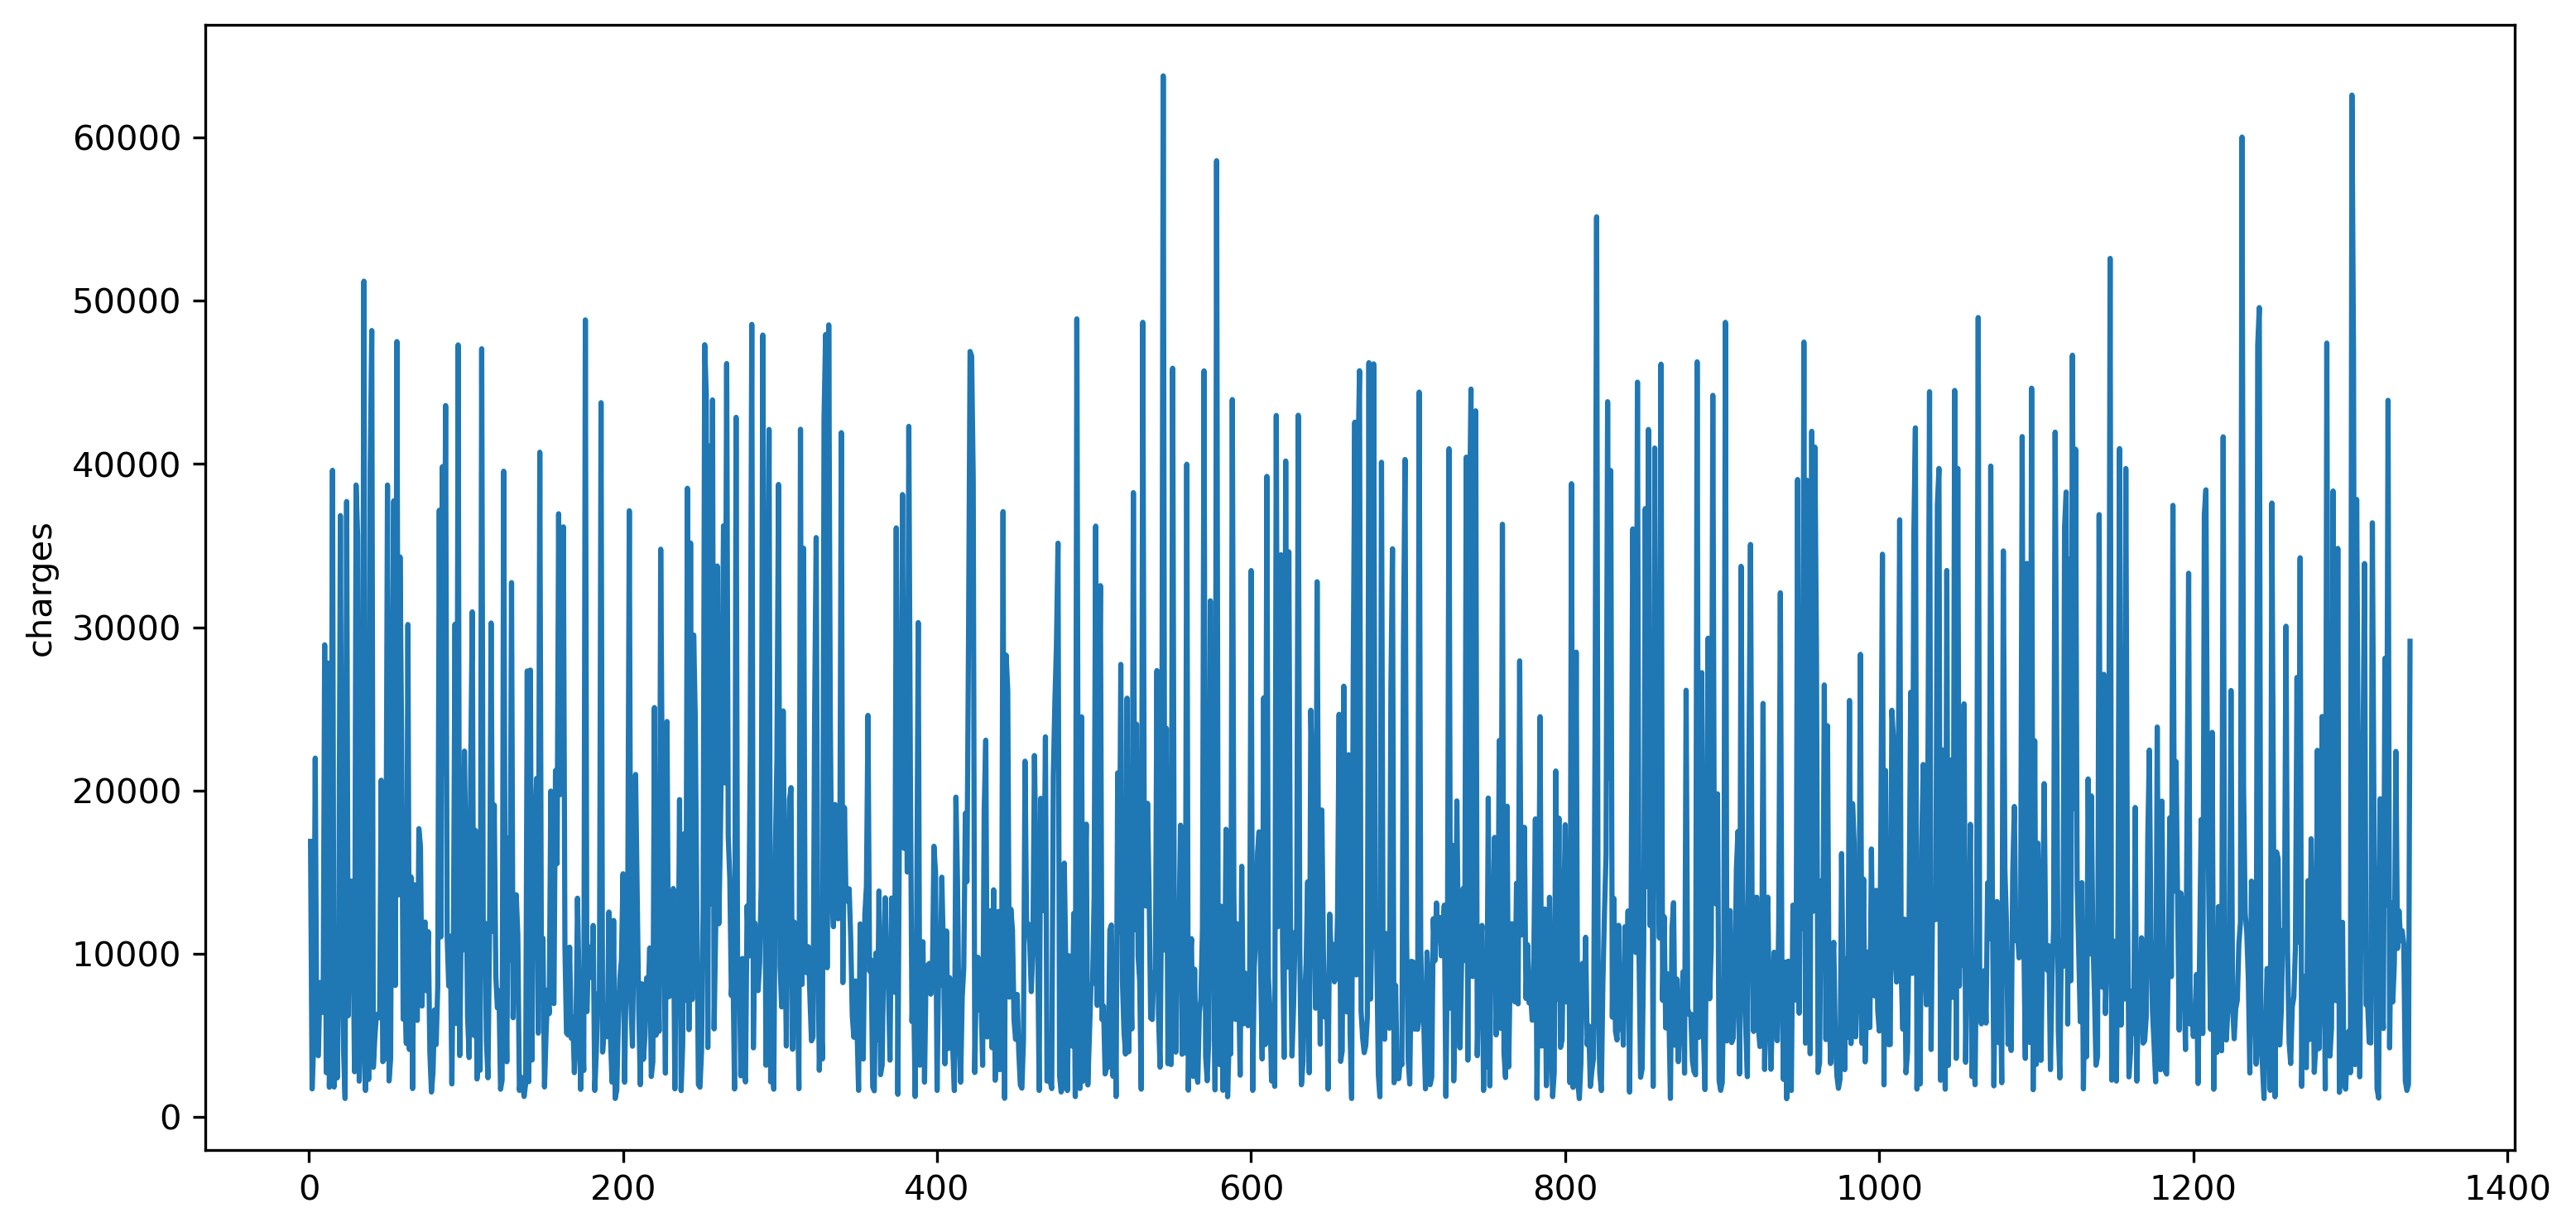

In [14]:
plt.figure(figsize=[12,6],dpi=300)
sns.lineplot(x=np.array(range(1,1339,1)),
             y=insurance_data['charges'])
plt.show()

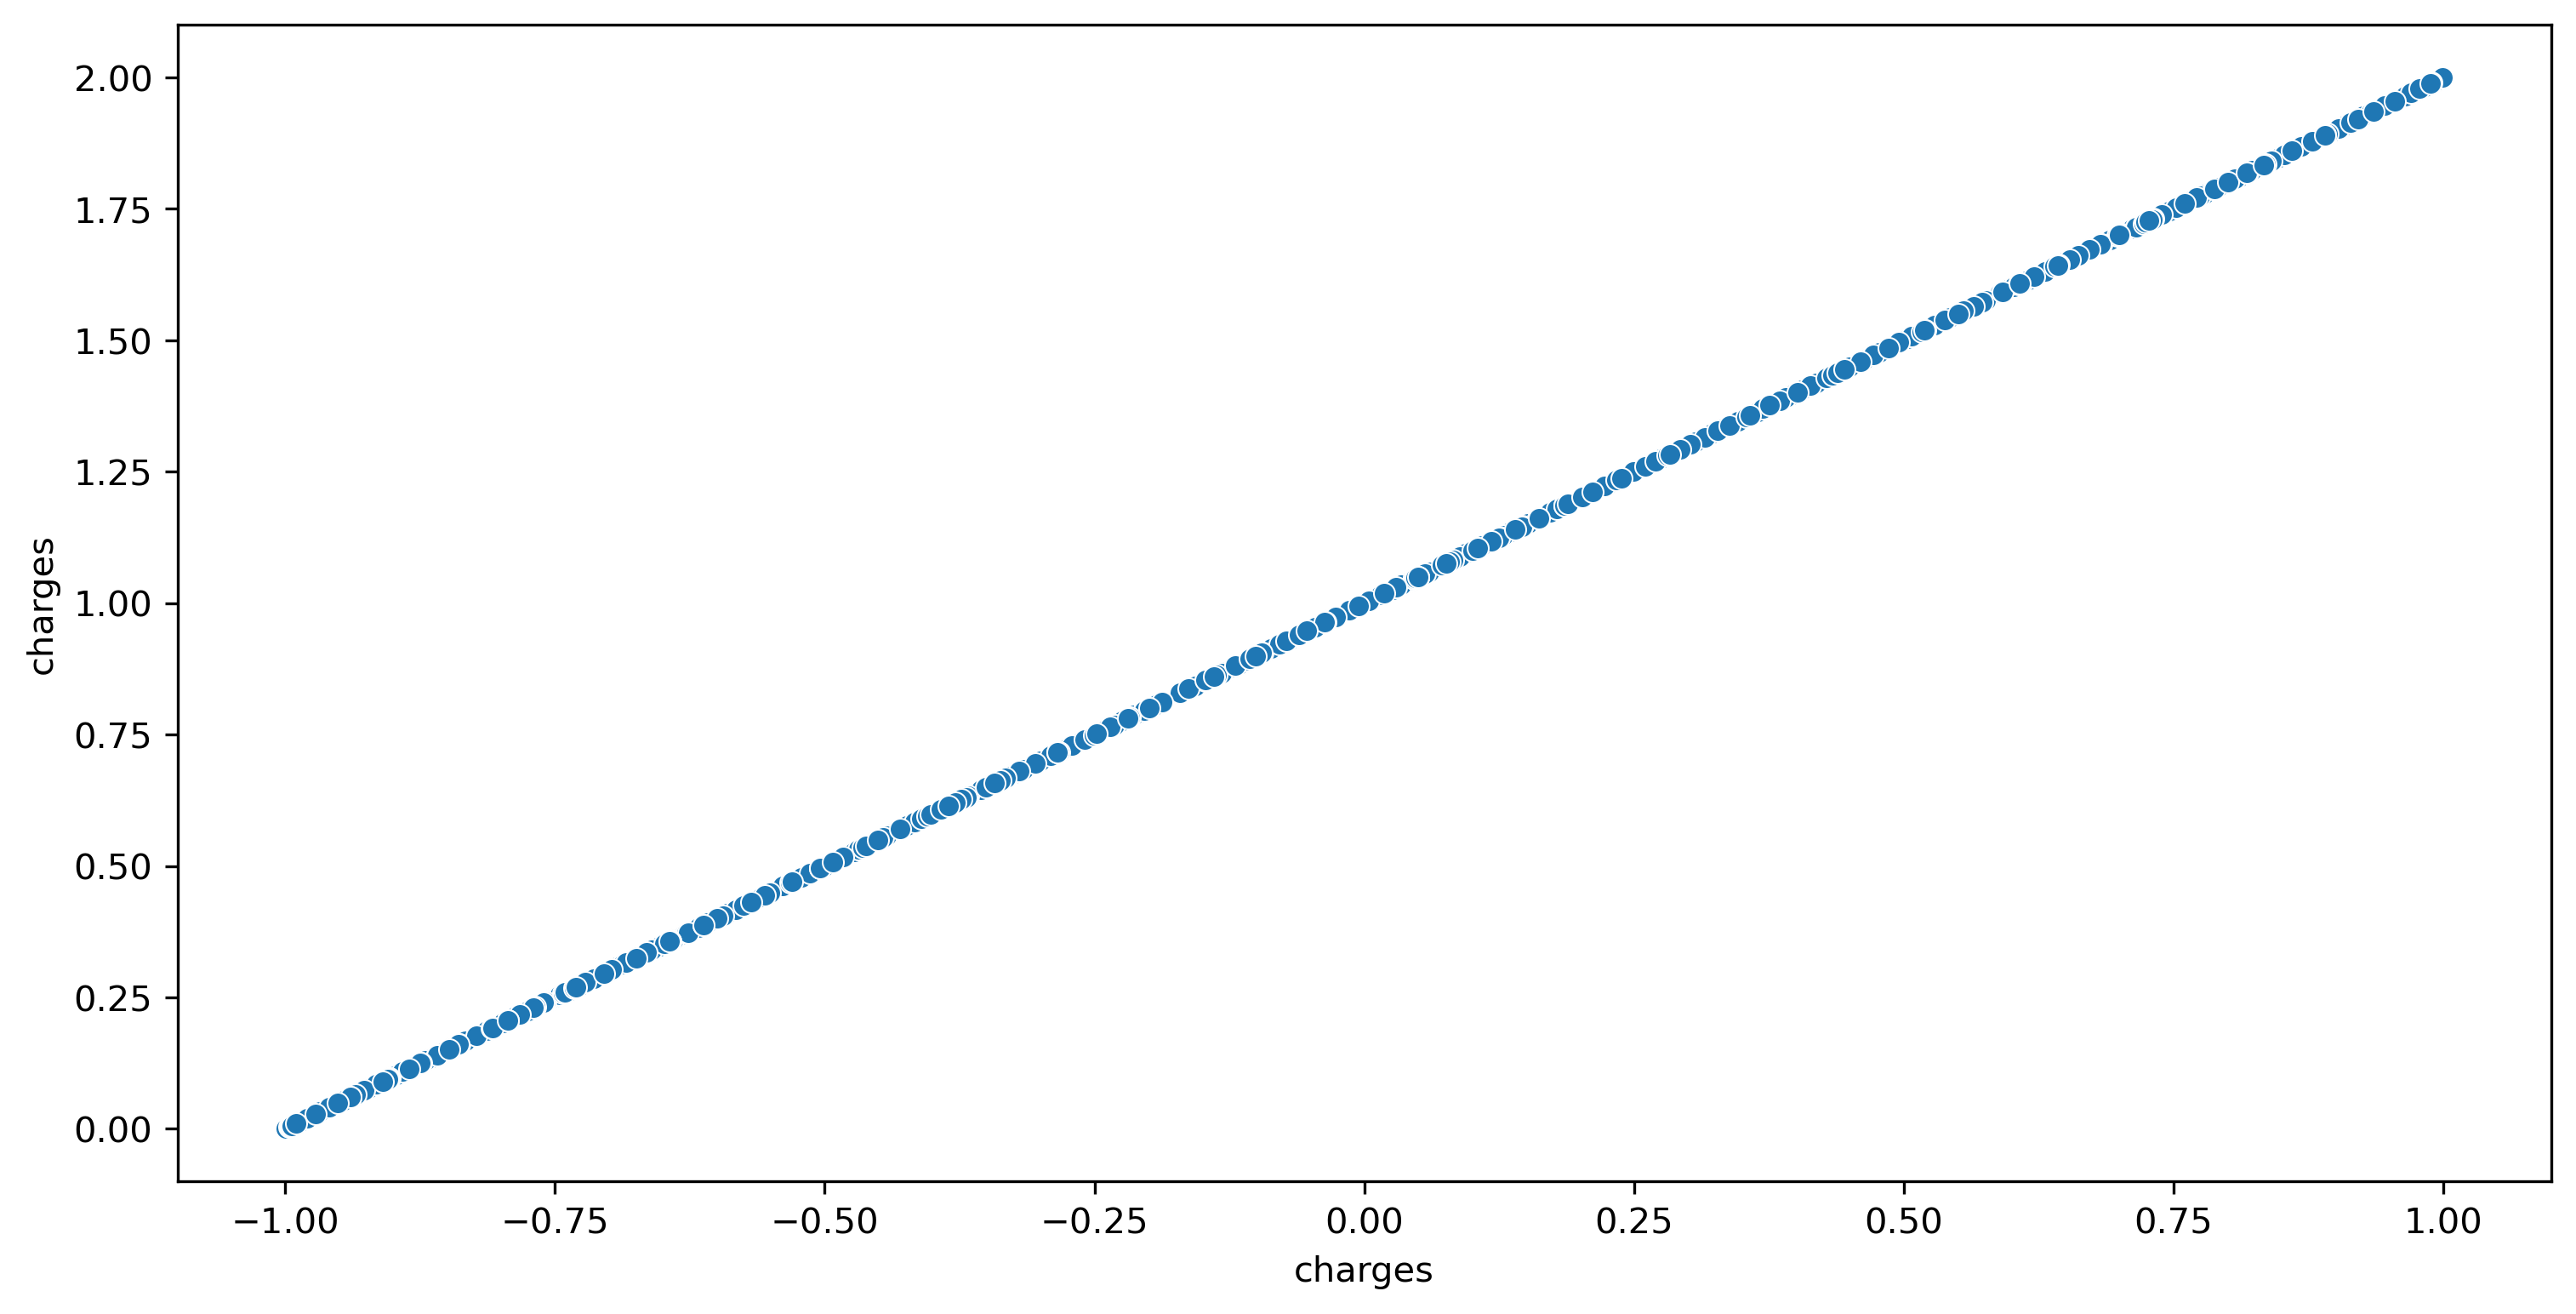

In [17]:
plt.figure(figsize=[12,6], dpi=300)
sns.scatterplot(x=np.sin(insurance_data['charges']),
                y=np.sin(insurance_data['charges']) + 1)
plt.show()

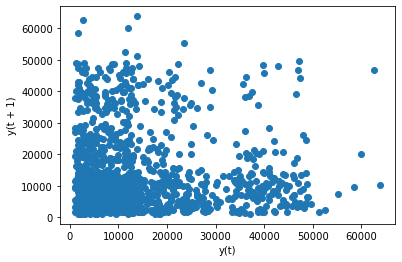

In [19]:
pd.plotting.lag_plot(insurance_data['charges'],lag=1)

In [20]:
insurance_data['charges'].shift(1)

0               NaN
1       16884.92400
2        1725.55230
3        4449.46200
4       21984.47061
           ...     
1333    11411.68500
1334    10600.54830
1335     2205.98080
1336     1629.83350
1337     2007.94500
Name: charges, Length: 1338, dtype: float64

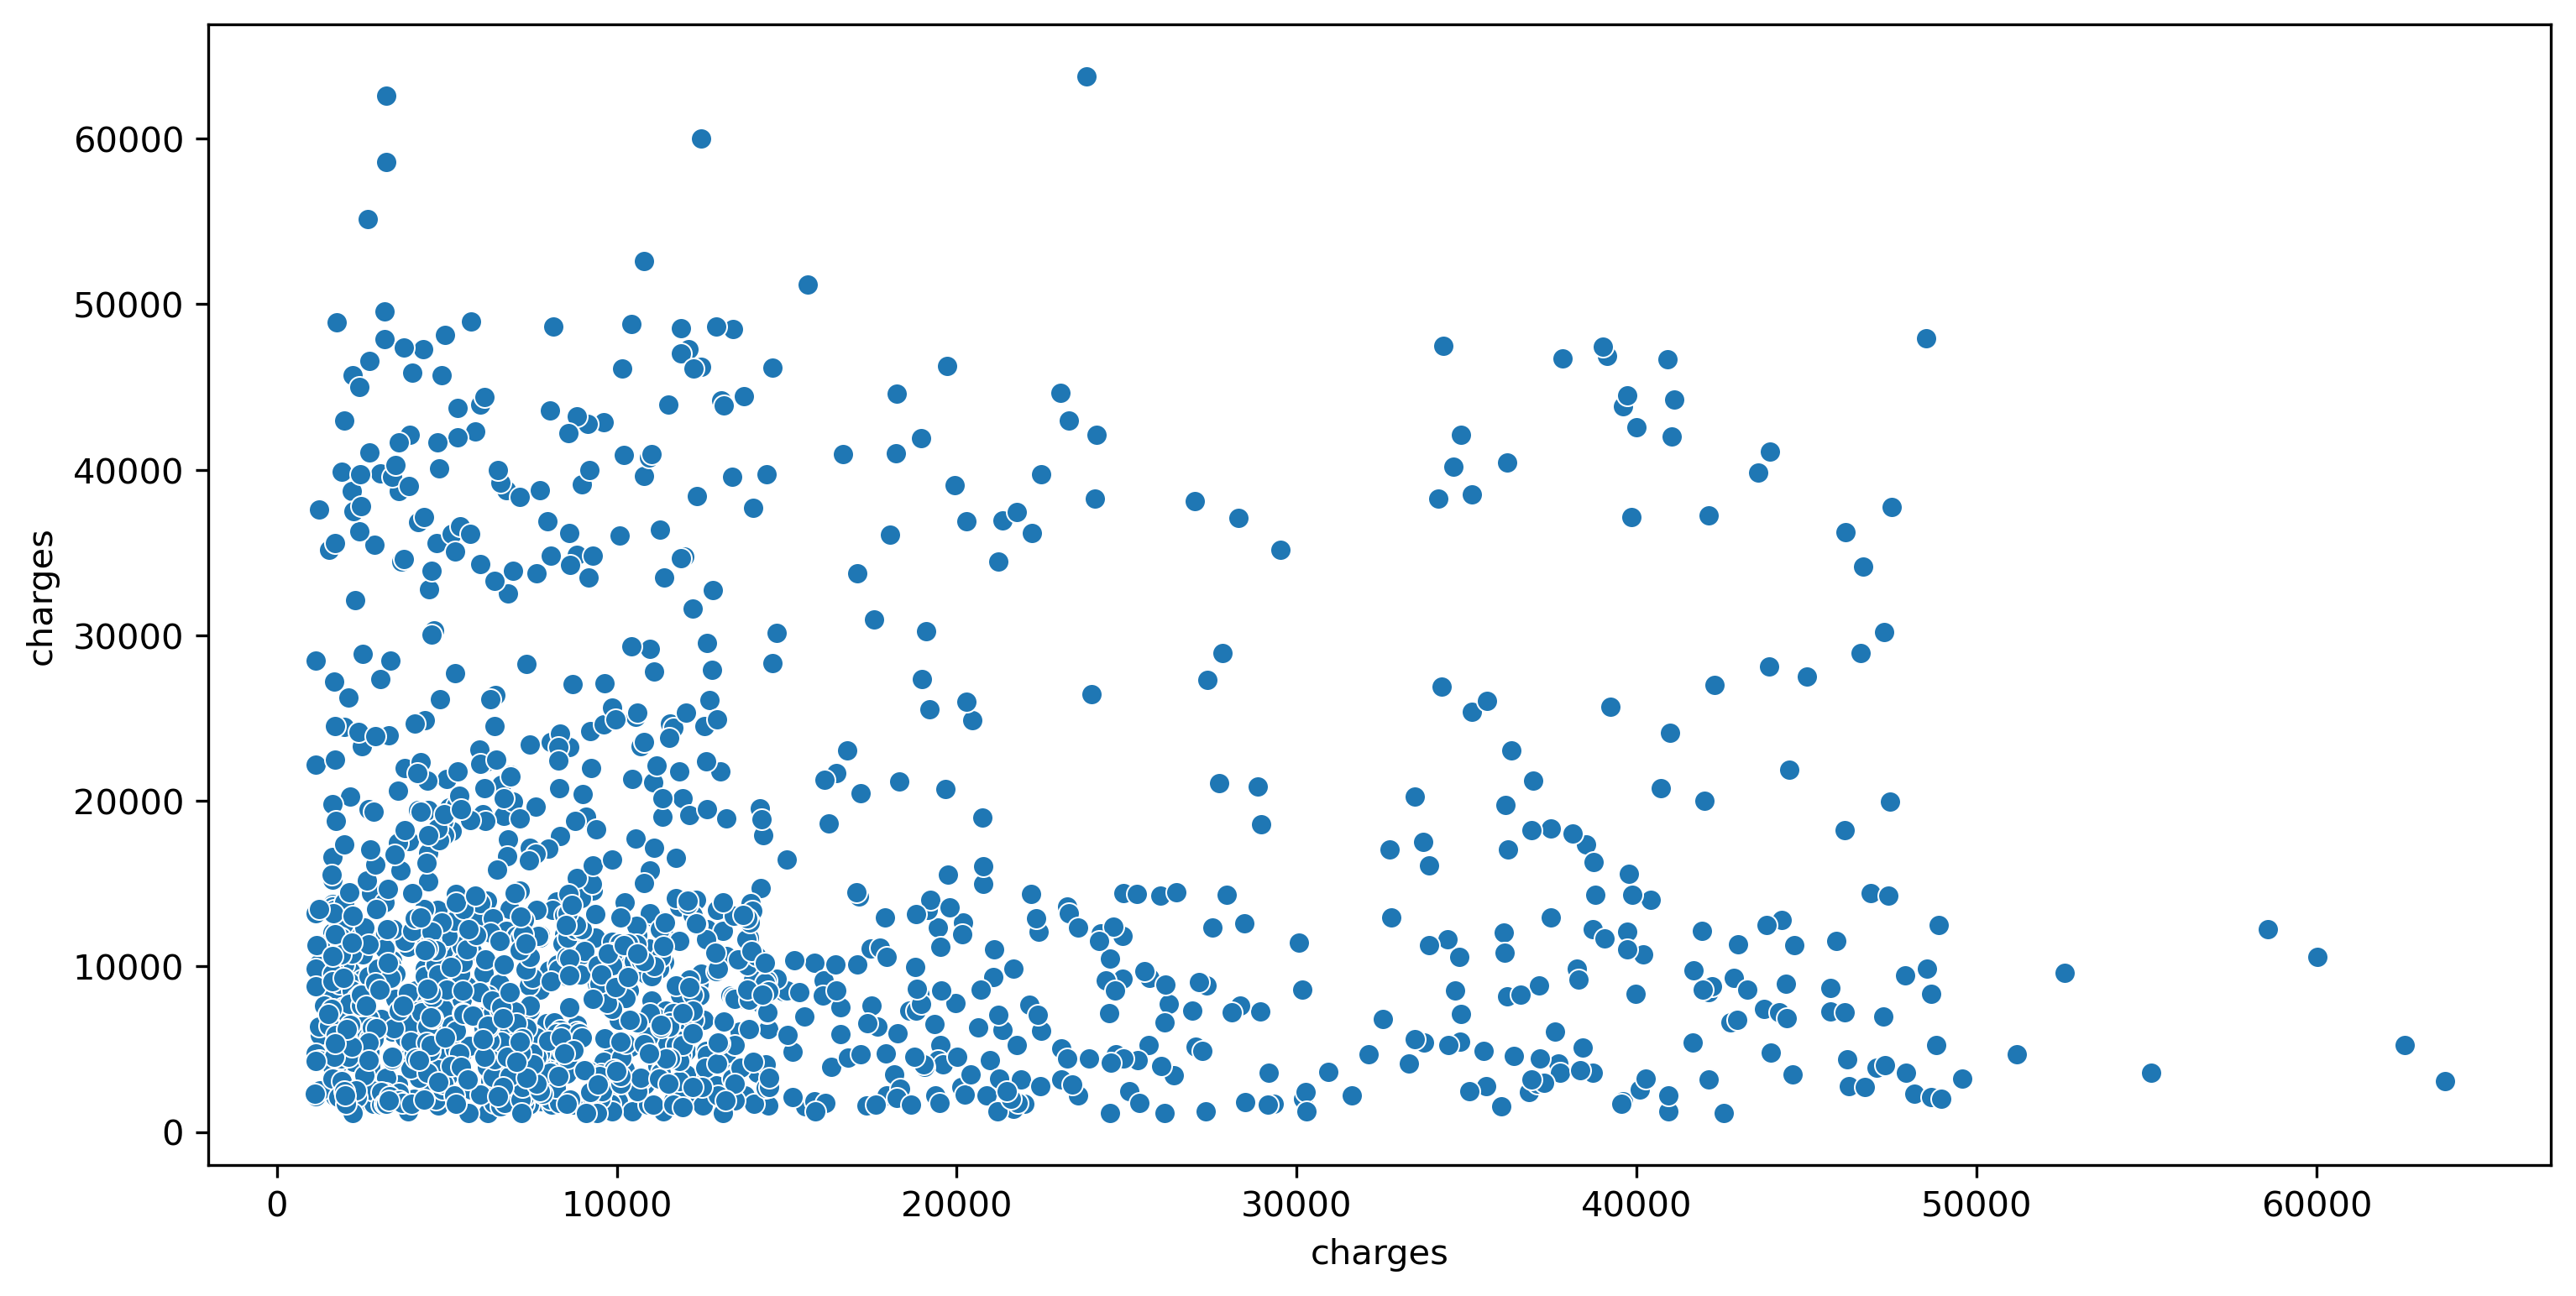

In [22]:
plt.figure(figsize=[12,6], dpi=300)
sns.scatterplot(x=insurance_data['charges'],
                y=insurance_data['charges'].shift(2))
plt.show()